In [2]:
pip install tensorflow


     -------------------------------------- 266.3/266.3 MB 3.1 MB/s eta 0:00:00
     -------------------------------------- 895.9/895.9 kB 4.4 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 4.9 MB/s eta 0:00:00
     -------------------------------------- 124.6/124.6 kB 3.7 MB/s eta 0:00:00
     ---------------------------------------- 6.0/6.0 MB 5.5 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 5.4 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB ? eta 0:00:00
     -------------------------------------- 439.2/439.2 kB 6.9 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 5.2 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 14.2/14.2 MB 5.5 MB/s eta 0:00:00
     ------------------------------------- 175.4/175.4 kB 10.3 MB/s eta 0:00:00
     -------------------------------------- 781.3/781.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.optimizers import SGD

In [2]:
Image.open('./train/0/00000_00000_00000.png')

# Model trained on German Dataset

In [3]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()
j=0
#Retrieving the images and their labels 
k=0
for i in range(classes):
    path = os.path.join(cur_path,'Train',str(i))
    images = os.listdir(path)
    
    for a in images:
        try:
            image = Image.open('./Train/'+str(i)+'/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
            k = k + 1
        except:
            # print("Error loading image")
            j=j+1

#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape, k)
# Number of Error image
print(j)

(39209, 30, 30, 3) (39209,) 39209
0


In [4]:
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


## Elu

In [5]:
model_elu = Sequential()
model_elu.add(Conv2D(filters=16, kernel_size=(3,3),strides=(2,2), activation='elu', input_shape=X_train.shape[1:]))
model_elu.add(Conv2D(filters=32, kernel_size=(3, 3),strides=(2,2), activation='elu'))
model_elu.add(Conv2D(filters=64, kernel_size=(3, 3),strides=(2,2), activation='elu'))
model_elu.add(Flatten())
model_elu.add(Dense(512, activation='elu'))
model_elu.add(Dense(43, activation='softmax'))

#Compilation of the model
model_elu.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 20
history_elu = model_elu.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
981/981 [==============================] - 11s 9ms/step - loss: 0.7053 - accuracy: 0.8200 - val_loss: 0.2672 - val_accuracy: 0.9282
Epoch 2/20
981/981 [==============================] - 9s 9ms/step - loss: 0.1702 - accuracy: 0.9509 - val_loss: 0.2214 - val_accuracy: 0.9393
Epoch 3/20
981/981 [==============================] - 9s 9ms/step - loss: 0.1313 - accuracy: 0.9618 - val_loss: 0.1947 - val_accuracy: 0.9484
Epoch 4/20
981/981 [==============================] - 9s 9ms/step - loss: 0.1044 - accuracy: 0.9693 - val_loss: 0.2192 - val_accuracy: 0.9484
Epoch 5/20
981/981 [==============================] - 9s 9ms/step - loss: 0.0946 - accuracy: 0.9742 - val_loss: 0.1891 - val_accuracy: 0.9569
Epoch 6/20
981/981 [==============================] - 9s 9ms/step - loss: 0.1023 - accuracy: 0.9742 - val_loss: 0.2265 - val_accuracy: 0.9572
Epoch 7/20
981/981 [==============================] - 9s 9ms/step - loss: 0.0797 - accuracy: 0.9793 - val_loss: 0.1559 - val_accuracy: 0.9739
Epoch

## Relu

In [6]:
model_relu = Sequential()
model_relu.add(Conv2D(filters=16, kernel_size=(3,3),strides=(2,2), activation='relu', input_shape=X_train.shape[1:]))
model_relu.add(Conv2D(filters=32, kernel_size=(3, 3),strides=(2,2), activation='relu'))
model_relu.add(Conv2D(filters=64, kernel_size=(3, 3),strides=(2,2), activation='relu'))
model_relu.add(Flatten())
model_relu.add(Dense(512, activation='relu'))
model_relu.add(Dense(43, activation='softmax'))

#Compilation of the model
sgd = SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model_relu.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

epochs = 20
history_relu = model_relu.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
981/981 [==============================] - 10s 9ms/step - loss: 1.1928 - accuracy: 0.7106 - val_loss: 0.5240 - val_accuracy: 0.8762
Epoch 2/20
981/981 [==============================] - 8s 9ms/step - loss: 0.3993 - accuracy: 0.9017 - val_loss: 0.3197 - val_accuracy: 0.9273
Epoch 3/20
981/981 [==============================] - 8s 9ms/step - loss: 0.2674 - accuracy: 0.9348 - val_loss: 0.3471 - val_accuracy: 0.9198
Epoch 4/20
981/981 [==============================] - 8s 8ms/step - loss: 0.1945 - accuracy: 0.9516 - val_loss: 0.2489 - val_accuracy: 0.9436
Epoch 5/20
981/981 [==============================] - 8s 9ms/step - loss: 0.1471 - accuracy: 0.9624 - val_loss: 0.2262 - val_accuracy: 0.9526
Epoch 6/20
981/981 [==============================] - 8s 9ms/step - loss: 0.1242 - accuracy: 0.9670 - val_loss: 0.2613 - val_accuracy: 0.9499
Epoch 7/20
981/981 [==============================] - 9s 9ms/step - loss: 0.1247 - accuracy: 0.9693 - val_loss: 0.2813 - val_accuracy: 0.9466
Epoch

## Tanh

In [7]:
model_tanh = Sequential()
model_tanh.add(Conv2D(filters=16, kernel_size=(3,3),strides=(2,2), activation='tanh', input_shape=X_train.shape[1:]))
model_tanh.add(Conv2D(filters=32, kernel_size=(3, 3),strides=(2,2), activation='tanh'))
model_tanh.add(Conv2D(filters=64, kernel_size=(3, 3),strides=(2,2), activation='tanh'))
model_tanh.add(Flatten())
model_tanh.add(Dense(512, activation='relu'))
model_tanh.add(Dense(43, activation='softmax'))

#Compilation of the model
sgd = SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model_tanh.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

epochs = 20
history_tanh = model_tanh.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
981/981 [==============================] - 10s 9ms/step - loss: 2.4451 - accuracy: 0.3798 - val_loss: 1.4517 - val_accuracy: 0.6140
Epoch 2/20
981/981 [==============================] - 9s 9ms/step - loss: 1.0603 - accuracy: 0.7166 - val_loss: 0.8446 - val_accuracy: 0.7701
Epoch 3/20
981/981 [==============================] - 9s 9ms/step - loss: 0.6909 - accuracy: 0.8118 - val_loss: 0.7461 - val_accuracy: 0.7932
Epoch 4/20
981/981 [==============================] - 9s 9ms/step - loss: 0.5614 - accuracy: 0.8430 - val_loss: 0.6228 - val_accuracy: 0.8180
Epoch 5/20
981/981 [==============================] - 9s 9ms/step - loss: 0.5091 - accuracy: 0.8588 - val_loss: 0.4503 - val_accuracy: 0.8675
Epoch 6/20
981/981 [==============================] - 9s 9ms/step - loss: 0.4700 - accuracy: 0.8676 - val_loss: 0.4485 - val_accuracy: 0.8706
Epoch 7/20
981/981 [==============================] - 9s 9ms/step - loss: 0.4044 - accuracy: 0.8867 - val_loss: 0.4074 - val_accuracy: 0.8826
Epoch

# Plotting graphs for different activation function

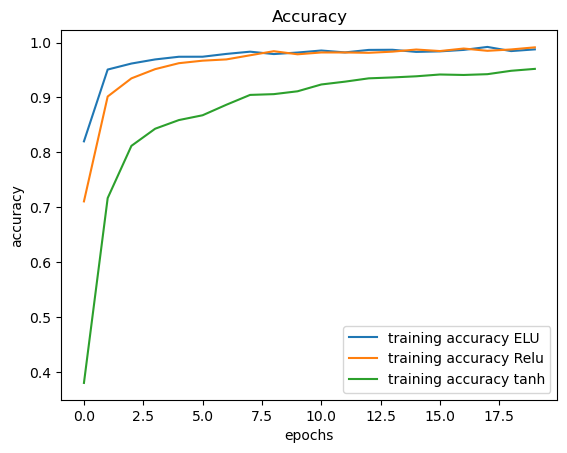

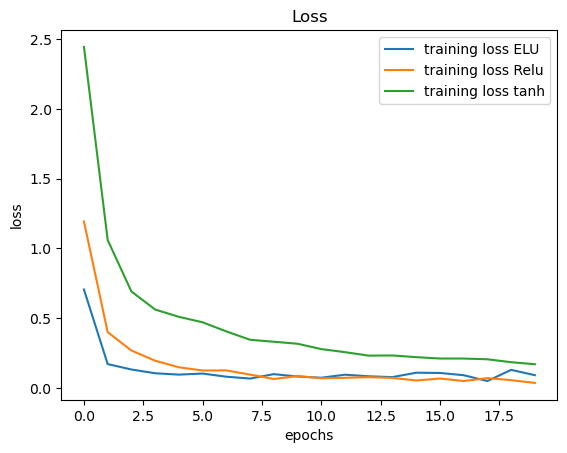

In [18]:
plt.figure(0)
plt.plot(history_elu.history['accuracy'], label='training accuracy ELU')
plt.plot(history_relu.history['accuracy'], label='training accuracy Relu')
plt.plot(history_tanh.history['accuracy'], label='training accuracy tanh')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history_elu.history['loss'], label='training loss ELU')
plt.plot(history_relu.history['loss'], label='training loss Relu')
plt.plot(history_tanh.history['loss'], label='training loss tanh')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Model Summary

In [25]:
model_elu.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 14, 14, 16)        448       
                                                                 
 conv2d_10 (Conv2D)          (None, 6, 6, 32)          4640      
                                                                 
 conv2d_11 (Conv2D)          (None, 2, 2, 64)          18496     
                                                                 
 flatten_3 (Flatten)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 512)               131584    
                                                                 
 dense_7 (Dense)             (None, 43)                22059     
                                                                 
Total params: 177,227
Trainable params: 177,227
Non-tr

In [24]:
model_r.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 14, 14, 16)        448       
                                                                 
 conv2d_19 (Conv2D)          (None, 6, 6, 32)          4640      
                                                                 
 conv2d_20 (Conv2D)          (None, 2, 2, 64)          18496     
                                                                 
 flatten_6 (Flatten)         (None, 256)               0         
                                                                 
 dense_12 (Dense)            (None, 512)               131584    
                                                                 
 dense_13 (Dense)            (None, 43)                22059     
                                                                 
Total params: 177,227
Trainable params: 177,227
Non-tr

In [26]:
model_tanh.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 14, 14, 16)        448       
                                                                 
 conv2d_28 (Conv2D)          (None, 6, 6, 32)          4640      
                                                                 
 conv2d_29 (Conv2D)          (None, 2, 2, 64)          18496     
                                                                 
 flatten_9 (Flatten)         (None, 256)               0         
                                                                 
 dense_18 (Dense)            (None, 512)               131584    
                                                                 
 dense_19 (Dense)            (None, 43)                22059     
                                                                 
Total params: 177,227
Trainable params: 177,227
Non-tr

In [27]:
model_sig.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 14, 14, 16)        448       
                                                                 
 conv2d_31 (Conv2D)          (None, 6, 6, 32)          4640      
                                                                 
 conv2d_32 (Conv2D)          (None, 2, 2, 64)          18496     
                                                                 
 flatten_10 (Flatten)        (None, 256)               0         
                                                                 
 dense_20 (Dense)            (None, 512)               131584    
                                                                 
 dense_21 (Dense)            (None, 43)                22059     
                                                                 
Total params: 177,227
Trainable params: 177,227
Non-t

[0.8557766079902649,
 0.8894414901733398,
 0.9352205991744995,
 0.9501402974128723,
 0.9436368346214294,
 0.9488650560379028,
 0.9515429735183716,
 0.9543483853340149,
 0.9641672968864441,
 0.9635297060012817,
 0.964422345161438,
 0.9674828052520752,
 0.966335117816925,
 0.9686304330825806,
 0.9517980217933655,
 0.9658250212669373,
 0.9543483853340149,
 0.9381535053253174,
 0.964422345161438,
 0.9659525752067566]

# Testing

In [31]:
from sklearn.metrics import accuracy_score

y_test = pd.read_csv('Test.csv')

labels=[]
imgs = y_test["Path"].values
data_test=[]
count = 0 
for index, img in enumerate(imgs):
    try:
        image = Image.open(img)
        image = image.resize((30,30))
        data_test.append(np.array(image))
        labels.append(np.array(y_test["ClassId"][index])) 
        count += 1     
    except:
        print("Error loading image")

X_test=np.array(data_test)

predict_x=model_r.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)
print(count)

395/395 [==============================] - 1s 3ms/step
12630


In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(labels, classes_x))

0.8973871733966746


In [34]:
model_r.save("traffic_classifier.h5")

In [39]:
#load the trained model to classify sign
from keras.models import load_model
model = load_model('traffic_classifier.h5')

#dictionary to label all traffic signs class.
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons' }



def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((30,30))
    image = np.expand_dims(image, axis=0)
    image = np.array(image)
    pred=model.predict([image])[0]
    pred=np.argmax(pred,axis=0)
    # pred = model.predict_classes([image])[0]
    sign = classes[pred+1]
    print(sign)

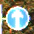

In [46]:
Image.open('./Test/00055.png')

In [47]:
classify('./Test/00055.png')

1/1 [==============================] - 0s 32ms/step
Ahead only


# Model trained on Chinese Dataset

In [9]:
import seaborn as sns
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.optimizers import SGD

In [10]:
train_df=pd.read_csv('./ChineseDataset/annotations.csv')

train_df.head()


,file_name,width,height,x1,y1,x2,y2,category
0,000_0001.png,134,128,19,7,120,117,0
1,000_0002.png,165,151,23,12,149,138,0
2,000_0003.png,128,122,22,14,116,105,0
3,000_0010.png,80,73,14,8,67,63,0
4,000_0011.png,186,174,36,15,155,157,0


In [11]:
import csv
ch_data = []
ch_labels = []
# image = Image.open('./images/000_0001.png')
# print(image)
with open('./ChineseDataset/annotations.csv') as file_obj:
      
    # Create reader object by passing the file
    # object to DictReader method
    reader_obj = csv.DictReader(file_obj)
      
    # Iterate over each row in the csv file
    # using reader object
    for row in reader_obj:
        try:
            image = Image.open('./ChineseDataset/images/'+row["file_name"])
            image = image.resize((30,30))
            image = np.array(image)
            ch_data.append(image)
            ch_labels.append(row["category"])
        except:
            print("Error loading image")

#Converting lists into numpy arrays
ch_data = np.array(ch_data)
ch_labels = np.array(ch_labels)
print(ch_data.shape, ch_labels.shape)

(6164, 30, 30, 3) (6164,)


In [12]:
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(ch_data, ch_labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
y_test_labels = y_test
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 58)
y_test = to_categorical(y_test, 58)

(4931, 30, 30, 3) (1233, 30, 30, 3) (4931,) (1233,)


## ELU for  Chinese Dataset

In [14]:
ch_model_elu = Sequential()
ch_model_elu.add(Conv2D(filters=16, kernel_size=(3,3),strides=(2,2), activation='elu', input_shape=X_train.shape[1:]))
ch_model_elu.add(Conv2D(filters=32, kernel_size=(3, 3),strides=(2,2), activation='elu'))
ch_model_elu.add(Conv2D(filters=64, kernel_size=(3, 3),strides=(2,2), activation='elu'))
ch_model_elu.add(Flatten())
ch_model_elu.add(Dense(512, activation='elu'))
ch_model_elu.add(Dense(58, activation='softmax'))

#Compilation of the model
ch_model_elu.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 20
ch_history_elu = ch_model_elu.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
155/155 [==============================] - 3s 11ms/step - loss: 2.1370 - accuracy: 0.6177 - val_loss: 0.5859 - val_accuracy: 0.8354
Epoch 2/20
155/155 [==============================] - 1s 10ms/step - loss: 0.2860 - accuracy: 0.9276 - val_loss: 0.3098 - val_accuracy: 0.9124
Epoch 3/20
155/155 [==============================] - 2s 10ms/step - loss: 0.0993 - accuracy: 0.9738 - val_loss: 0.1826 - val_accuracy: 0.9594
Epoch 4/20
155/155 [==============================] - 2s 10ms/step - loss: 0.0433 - accuracy: 0.9878 - val_loss: 0.1587 - val_accuracy: 0.9708
Epoch 5/20
155/155 [==============================] - 2s 10ms/step - loss: 0.0561 - accuracy: 0.9840 - val_loss: 0.1771 - val_accuracy: 0.9676
Epoch 6/20
155/155 [==============================] - 2s 10ms/step - loss: 0.0401 - accuracy: 0.9868 - val_loss: 0.2017 - val_accuracy: 0.9578
Epoch 7/20
155/155 [==============================] - 1s 9ms/step - loss: 0.0348 - accuracy: 0.9905 - val_loss: 0.2591 - val_accuracy: 0.9440


## Relu for Chinese Dataset

In [15]:
ch_model_relu = Sequential()
ch_model_relu.add(Conv2D(filters=16, kernel_size=(3,3),strides=(2,2), activation='relu', input_shape=X_train.shape[1:]))
ch_model_relu.add(Conv2D(filters=32, kernel_size=(3, 3),strides=(2,2), activation='relu'))
ch_model_relu.add(Conv2D(filters=64, kernel_size=(3, 3),strides=(2,2), activation='relu'))
ch_model_relu.add(Flatten())
ch_model_relu.add(Dense(512, activation='relu'))
ch_model_relu.add(Dense(58, activation='softmax'))

#Compilation of the model
sgd = SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
ch_model_relu.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

epochs = 20
ch_history_relu = ch_model_relu.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
155/155 [==============================] - 2s 11ms/step - loss: 3.0135 - accuracy: 0.3342 - val_loss: 1.8920 - val_accuracy: 0.5101
Epoch 2/20
155/155 [==============================] - 1s 9ms/step - loss: 1.3564 - accuracy: 0.6559 - val_loss: 1.1518 - val_accuracy: 0.7137
Epoch 3/20
155/155 [==============================] - 1s 9ms/step - loss: 0.7476 - accuracy: 0.8017 - val_loss: 0.7796 - val_accuracy: 0.8013
Epoch 4/20
155/155 [==============================] - 1s 9ms/step - loss: 0.4712 - accuracy: 0.8763 - val_loss: 0.6642 - val_accuracy: 0.8386
Epoch 5/20
155/155 [==============================] - 1s 9ms/step - loss: 0.2871 - accuracy: 0.9183 - val_loss: 0.5134 - val_accuracy: 0.8767
Epoch 6/20
155/155 [==============================] - 1s 9ms/step - loss: 0.1804 - accuracy: 0.9475 - val_loss: 2.0758 - val_accuracy: 0.6399
Epoch 7/20
155/155 [==============================] - 1s 9ms/step - loss: 0.4537 - accuracy: 0.8832 - val_loss: 0.5463 - val_accuracy: 0.8816
Epoch

## Tanh

In [17]:
ch_model_tanh = Sequential()
ch_model_tanh.add(Conv2D(filters=16, kernel_size=(3,3),strides=(2,2), activation='tanh', input_shape=X_train.shape[1:]))
ch_model_tanh.add(Conv2D(filters=32, kernel_size=(3, 3),strides=(2,2), activation='tanh'))
ch_model_tanh.add(Conv2D(filters=64, kernel_size=(3, 3),strides=(2,2), activation='tanh'))
ch_model_tanh.add(Flatten())
ch_model_tanh.add(Dense(512, activation='relu'))
ch_model_tanh.add(Dense(58, activation='softmax'))

#Compilation of the model
sgd = SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
ch_model_tanh.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

epochs = 20
ch_history_tanh = ch_model_tanh.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
155/155 [==============================] - 2s 11ms/step - loss: 3.5326 - accuracy: 0.1541 - val_loss: 3.1470 - val_accuracy: 0.2441
Epoch 2/20
155/155 [==============================] - 1s 9ms/step - loss: 2.7833 - accuracy: 0.3172 - val_loss: 2.5291 - val_accuracy: 0.3609
Epoch 3/20
155/155 [==============================] - 1s 9ms/step - loss: 2.2692 - accuracy: 0.4149 - val_loss: 2.0986 - val_accuracy: 0.4615
Epoch 4/20
155/155 [==============================] - 1s 9ms/step - loss: 1.8982 - accuracy: 0.5173 - val_loss: 1.8759 - val_accuracy: 0.5572
Epoch 5/20
155/155 [==============================] - 1s 9ms/step - loss: 1.6091 - accuracy: 0.5964 - val_loss: 1.5496 - val_accuracy: 0.6083
Epoch 6/20
155/155 [==============================] - 1s 9ms/step - loss: 1.3932 - accuracy: 0.6447 - val_loss: 1.3738 - val_accuracy: 0.6594
Epoch 7/20
155/155 [==============================] - 1s 9ms/step - loss: 1.2196 - accuracy: 0.6808 - val_loss: 1.2325 - val_accuracy: 0.6699
Epoch

In [19]:
ch_model_relu.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 14, 14, 16)        448       
                                                                 
 conv2d_16 (Conv2D)          (None, 6, 6, 32)          4640      
                                                                 
 conv2d_17 (Conv2D)          (None, 2, 2, 64)          18496     
                                                                 
 flatten_5 (Flatten)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 512)               131584    
                                                                 
 dense_11 (Dense)            (None, 58)                29754     
                                                                 
Total params: 184,922
Trainable params: 184,922
Non-tr

# Accuracy- Loss graphs for Chinese dataset

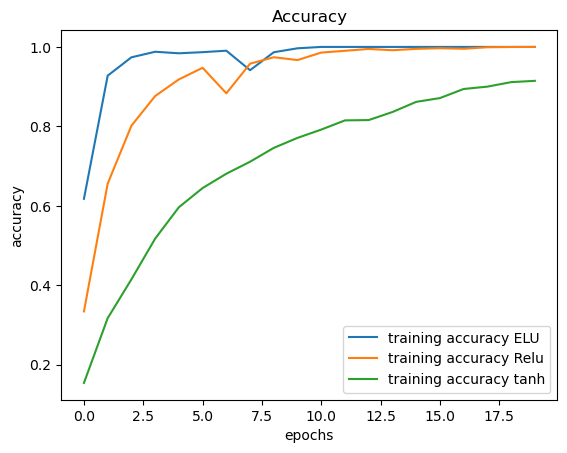

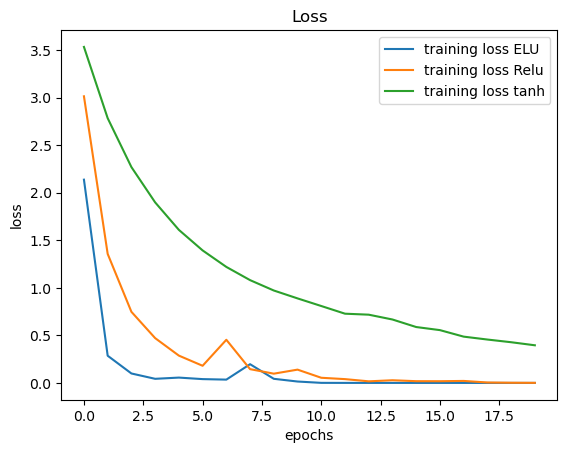

In [20]:
plt.figure(0)
plt.plot(ch_history_elu.history['accuracy'], label='training accuracy ELU')
plt.plot(ch_history_relu.history['accuracy'], label='training accuracy Relu')
plt.plot(ch_history_tanh.history['accuracy'], label='training accuracy tanh')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(ch_history_elu.history['loss'], label='training loss ELU')
plt.plot(ch_history_relu.history['loss'], label='training loss Relu')
plt.plot(ch_history_tanh.history['loss'], label='training loss tanh')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [14]:
predict_x=ch_model_relu.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

39/39 [==============================] - 0s 2ms/step


In [15]:
y_labels=[]
for value in y_test_labels:
    y_labels.append(int(value))

from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_labels, classes_x))

0.9740470397404704


# Indian Dataset

In [21]:
train_df=pd.read_csv('./IndianDataset/traffic_sign.csv')

In [22]:
train_df.head()
train_df.shape

(55, 2)

In [25]:
data = []
labels = []
classes = 55
cur_path = os.getcwd()
j=0
#Retrieving the images and their labels 
k=0
for i in range(classes):
    path = os.path.join(cur_path,'./IndianDataset/Images',str(i))
    images = os.listdir(path)
    
    for a in images:
        try:
            image = Image.open('./IndianDataset/Images/'+str(i)+'/'+ a).convert('RGB')
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
            k = k + 1
        except:
            # print("Error loading image")
            j=j+1

#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape, k)
# Number of Error image
print(j)

(13552, 30, 30, 3) (13552,) 13552
0


In [31]:
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
y_test_labels = y_test
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 55)
y_test = to_categorical(y_test, 58)

(10841, 30, 30, 3) (2711, 30, 30, 3) (10841,) (2711,)


In [33]:
print(X_test[0].shape)
print(y_test.shape)

(30, 30, 3)
(2711, 55)


## ELU on  Indian Dataset

In [34]:
ind_model_elu = Sequential()
ind_model_elu.add(Conv2D(filters=16, kernel_size=(3,3),strides=(2,2), activation='elu', input_shape=X_train.shape[1:]))
ind_model_elu.add(Conv2D(filters=32, kernel_size=(3, 3),strides=(2,2), activation='elu'))
ind_model_elu.add(Conv2D(filters=64, kernel_size=(3, 3),strides=(2,2), activation='elu'))
ind_model_elu.add(Flatten())
ind_model_elu.add(Dense(512, activation='elu'))
ind_model_elu.add(Dense(55, activation='softmax'))

#Compilation of the model
ind_model_elu.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 20
ind_history_elu = ind_model_elu.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
339/339 [==============================] - 5s 10ms/step - loss: 2.4855 - accuracy: 0.4263 - val_loss: 1.6110 - val_accuracy: 0.5751
Epoch 2/20
339/339 [==============================] - 3s 9ms/step - loss: 1.0928 - accuracy: 0.6844 - val_loss: 1.2796 - val_accuracy: 0.6629
Epoch 3/20
339/339 [==============================] - 3s 9ms/step - loss: 0.6980 - accuracy: 0.7912 - val_loss: 1.2669 - val_accuracy: 0.6776
Epoch 4/20
339/339 [==============================] - 3s 9ms/step - loss: 0.4889 - accuracy: 0.8418 - val_loss: 1.3136 - val_accuracy: 0.6905
Epoch 5/20
339/339 [==============================] - 3s 9ms/step - loss: 0.4135 - accuracy: 0.8701 - val_loss: 1.3907 - val_accuracy: 0.6846
Epoch 6/20
339/339 [==============================] - 3s 9ms/step - loss: 0.3220 - accuracy: 0.8963 - val_loss: 1.4478 - val_accuracy: 0.6938
Epoch 7/20
339/339 [==============================] - 3s 9ms/step - loss: 0.3030 - accuracy: 0.9066 - val_loss: 1.5678 - val_accuracy: 0.6879
Epoch

# Relu on Indian Dataset

In [35]:
ind_model_relu = Sequential()
ind_model_relu.add(Conv2D(filters=16, kernel_size=(3,3),strides=(2,2), activation='relu', input_shape=X_train.shape[1:]))
ind_model_relu.add(Conv2D(filters=32, kernel_size=(3, 3),strides=(2,2), activation='relu'))
ind_model_relu.add(Conv2D(filters=64, kernel_size=(3, 3),strides=(2,2), activation='relu'))
ind_model_relu.add(Flatten())
ind_model_relu.add(Dense(512, activation='relu'))
ind_model_relu.add(Dense(55, activation='softmax'))

#Compilation of the model
sgd = SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
ind_model_relu.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

epochs = 20
ind_history_relu = ind_model_relu.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
339/339 [==============================] - 4s 9ms/step - loss: 3.7973 - accuracy: 0.0960 - val_loss: 3.5172 - val_accuracy: 0.1313
Epoch 2/20
339/339 [==============================] - 3s 9ms/step - loss: 3.3395 - accuracy: 0.1766 - val_loss: 3.2177 - val_accuracy: 0.2047
Epoch 3/20
339/339 [==============================] - 3s 9ms/step - loss: 2.9202 - accuracy: 0.2824 - val_loss: 2.7777 - val_accuracy: 0.3276
Epoch 4/20
339/339 [==============================] - 3s 9ms/step - loss: 2.4864 - accuracy: 0.3929 - val_loss: 2.4973 - val_accuracy: 0.4102
Epoch 5/20
339/339 [==============================] - 3s 9ms/step - loss: 2.1579 - accuracy: 0.4650 - val_loss: 2.2795 - val_accuracy: 0.4589
Epoch 6/20
339/339 [==============================] - 3s 9ms/step - loss: 1.8688 - accuracy: 0.5333 - val_loss: 2.1333 - val_accuracy: 0.4987
Epoch 7/20
339/339 [==============================] - 3s 9ms/step - loss: 1.6535 - accuracy: 0.5835 - val_loss: 2.0362 - val_accuracy: 0.5301
Epoch 

## Tanh on Indian dataset

In [36]:
ind_model_tanh = Sequential()
ind_model_tanh.add(Conv2D(filters=16, kernel_size=(3,3),strides=(2,2), activation='tanh', input_shape=X_train.shape[1:]))
ind_model_tanh.add(Conv2D(filters=32, kernel_size=(3, 3),strides=(2,2), activation='tanh'))
ind_model_tanh.add(Conv2D(filters=64, kernel_size=(3, 3),strides=(2,2), activation='tanh'))
ind_model_tanh.add(Flatten())
ind_model_tanh.add(Dense(512, activation='relu'))
ind_model_tanh.add(Dense(55, activation='softmax'))

#Compilation of the model
sgd = SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
ind_model_tanh.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

epochs = 20
ind_history_tanh = ind_model_tanh.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
339/339 [==============================] - 4s 10ms/step - loss: 3.6916 - accuracy: 0.1196 - val_loss: 3.3993 - val_accuracy: 0.1601
Epoch 2/20
339/339 [==============================] - 3s 9ms/step - loss: 3.1779 - accuracy: 0.1944 - val_loss: 3.0974 - val_accuracy: 0.2128
Epoch 3/20
339/339 [==============================] - 3s 9ms/step - loss: 2.7646 - accuracy: 0.2916 - val_loss: 2.5807 - val_accuracy: 0.3368
Epoch 4/20
339/339 [==============================] - 3s 9ms/step - loss: 2.3342 - accuracy: 0.3964 - val_loss: 2.2170 - val_accuracy: 0.4437
Epoch 5/20
339/339 [==============================] - 3s 9ms/step - loss: 2.0637 - accuracy: 0.4605 - val_loss: 1.9938 - val_accuracy: 0.4913
Epoch 6/20
339/339 [==============================] - 3s 9ms/step - loss: 1.7868 - accuracy: 0.5308 - val_loss: 1.7982 - val_accuracy: 0.5326
Epoch 7/20
339/339 [==============================] - 3s 9ms/step - loss: 1.6373 - accuracy: 0.5678 - val_loss: 1.6740 - val_accuracy: 0.5688
Epoch

# Accuracy- Loss graphs for Indian dataset

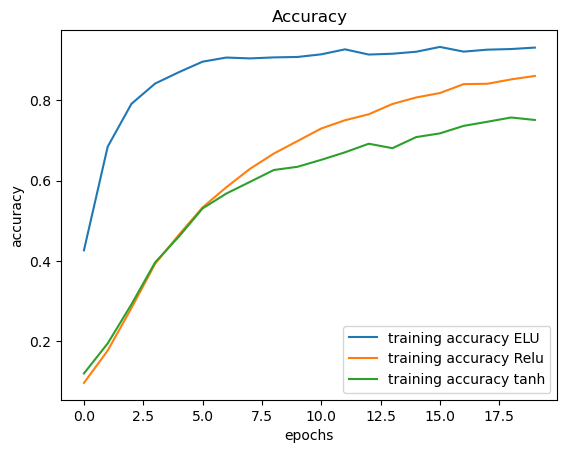

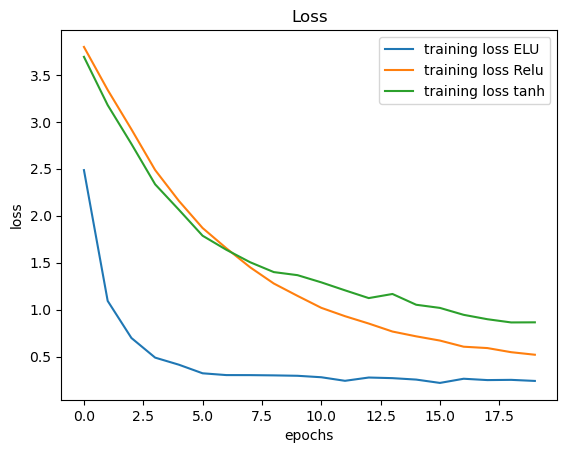

In [38]:
plt.figure(0)
plt.plot(ind_history_elu.history['accuracy'], label='training accuracy ELU')
plt.plot(ind_history_relu.history['accuracy'], label='training accuracy Relu')
plt.plot(ind_history_tanh.history['accuracy'], label='training accuracy tanh')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(ind_history_elu.history['loss'], label='training loss ELU')
plt.plot(ind_history_relu.history['loss'], label='training loss Relu')
plt.plot(ind_history_tanh.history['loss'], label='training loss tanh')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [18]:
model_r.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 14, 14, 16)        448       
                                                                 
 conv2d_10 (Conv2D)          (None, 6, 6, 32)          4640      
                                                                 
 conv2d_11 (Conv2D)          (None, 2, 2, 64)          18496     
                                                                 
 flatten_3 (Flatten)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 512)               131584    
                                                                 
 dense_7 (Dense)             (None, 58)                29754     
                                                                 
Total params: 184,922
Trainable params: 184,922
Non-tr

In [19]:
predict_x=model_r.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

85/85 [==============================] - 0s 2ms/step


In [20]:
y_labels=[]
for value in y_test_labels:
    y_labels.append(int(value))

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_labels, classes_x))

0.6779786056805607


# Persian Dataset

In [39]:
train_df=pd.read_csv('./PersianDataset/train.csv')

In [40]:
train_df.head()
train_df.shape

(43, 2)

In [41]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()
j=0
#Retrieving the images and their labels 
k=0
for i in range(classes):
    path = os.path.join(cur_path,'./PersianDataset/train',str(i))
    images = os.listdir(path)
    
    for a in images:
        try:
            image = Image.open('./PersianDataset/train/'+str(i)+'/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
            k = k + 1
        except:
            # print("Error loading image")
            j=j+1

#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape, k)
# Number of Error image
print(j)

(14405, 30, 30, 3) (14405,) 14405
0


In [42]:
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
y_test_labels = y_test
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(11524, 30, 30, 3) (2881, 30, 30, 3) (11524,) (2881,)


In [43]:
print(X_test[0].shape)
print(y_test.shape)

(30, 30, 3)
(2881, 43)


## ELU on  Persian Dataset

In [44]:
per_model_elu = Sequential()
per_model_elu.add(Conv2D(filters=16, kernel_size=(3,3),strides=(2,2), activation='elu', input_shape=X_train.shape[1:]))
per_model_elu.add(Conv2D(filters=32, kernel_size=(3, 3),strides=(2,2), activation='elu'))
per_model_elu.add(Conv2D(filters=64, kernel_size=(3, 3),strides=(2,2), activation='elu'))
per_model_elu.add(Flatten())
per_model_elu.add(Dense(512, activation='elu'))
per_model_elu.add(Dense(43, activation='softmax'))

#Compilation of the model
per_model_elu.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 20
per_history_elu = per_model_elu.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
361/361 [==============================] - 2s 5ms/step - loss: 1.0739 - accuracy: 0.7523 - val_loss: 0.5030 - val_accuracy: 0.8612
Epoch 2/20
361/361 [==============================] - 2s 4ms/step - loss: 0.2971 - accuracy: 0.9216 - val_loss: 0.3938 - val_accuracy: 0.8983
Epoch 3/20
361/361 [==============================] - 2s 4ms/step - loss: 0.1780 - accuracy: 0.9476 - val_loss: 0.3876 - val_accuracy: 0.8931
Epoch 4/20
361/361 [==============================] - 2s 4ms/step - loss: 0.1274 - accuracy: 0.9604 - val_loss: 0.3633 - val_accuracy: 0.9146
Epoch 5/20
361/361 [==============================] - 2s 4ms/step - loss: 0.1148 - accuracy: 0.9651 - val_loss: 0.4262 - val_accuracy: 0.9084
Epoch 6/20
361/361 [==============================] - 2s 4ms/step - loss: 0.1407 - accuracy: 0.9583 - val_loss: 0.4203 - val_accuracy: 0.9111
Epoch 7/20
361/361 [==============================] - 2s 5ms/step - loss: 0.0489 - accuracy: 0.9846 - val_loss: 0.3355 - val_accuracy: 0.9288
Epoch 

# Relu on Persian Dataset

In [46]:
per_model_relu = Sequential()
per_model_relu.add(Conv2D(filters=16, kernel_size=(3,3),strides=(2,2), activation='relu', input_shape=X_train.shape[1:]))
per_model_relu.add(Conv2D(filters=32, kernel_size=(3, 3),strides=(2,2), activation='relu'))
per_model_relu.add(Conv2D(filters=64, kernel_size=(3, 3),strides=(2,2), activation='relu'))
per_model_relu.add(Flatten())
per_model_relu.add(Dense(512, activation='relu'))
per_model_relu.add(Dense(43))

#Compilation of the model
sgd = SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
per_model_relu.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

epochs = 20
per_history_relu = per_model_relu.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
361/361 [==============================] - 2s 4ms/step - loss: 1.6930 - accuracy: 0.5978 - val_loss: 1.0059 - val_accuracy: 0.7379
Epoch 2/20
361/361 [==============================] - 1s 4ms/step - loss: 0.6000 - accuracy: 0.8467 - val_loss: 0.7503 - val_accuracy: 0.8174
Epoch 3/20
361/361 [==============================] - 2s 5ms/step - loss: 0.4205 - accuracy: 0.8909 - val_loss: 0.5389 - val_accuracy: 0.8695
Epoch 4/20
361/361 [==============================] - 1s 4ms/step - loss: 0.3165 - accuracy: 0.9194 - val_loss: 0.3874 - val_accuracy: 0.9000
Epoch 5/20
361/361 [==============================] - 1s 4ms/step - loss: 0.2499 - accuracy: 0.9342 - val_loss: 0.4554 - val_accuracy: 0.9042
Epoch 6/20
361/361 [==============================] - 2s 4ms/step - loss: 0.1885 - accuracy: 0.9461 - val_loss: 0.3997 - val_accuracy: 0.9160
Epoch 7/20
361/361 [==============================] - 2s 5ms/step - loss: 0.1429 - accuracy: 0.9584 - val_loss: 0.3474 - val_accuracy: 0.9247
Epoch 

## Tanh on Persian dataset

In [47]:
per_model_tanh = Sequential()
per_model_tanh.add(Conv2D(filters=16, kernel_size=(3,3),strides=(2,2), activation='tanh', input_shape=X_train.shape[1:]))
per_model_tanh.add(Conv2D(filters=32, kernel_size=(3, 3),strides=(2,2), activation='tanh'))
per_model_tanh.add(Conv2D(filters=64, kernel_size=(3, 3),strides=(2,2), activation='tanh'))
per_model_tanh.add(Flatten())
per_model_tanh.add(Dense(512, activation='relu'))
per_model_tanh.add(Dense(43, activation='softmax'))

#Compilation of the model
sgd = SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
per_model_tanh.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

epochs = 20
per_history_tanh = per_model_tanh.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
361/361 [==============================] - 2s 4ms/step - loss: 2.8747 - accuracy: 0.2790 - val_loss: 2.1299 - val_accuracy: 0.4571
Epoch 2/20
361/361 [==============================] - 1s 4ms/step - loss: 1.6902 - accuracy: 0.5974 - val_loss: 1.3946 - val_accuracy: 0.6699
Epoch 3/20
361/361 [==============================] - 1s 4ms/step - loss: 1.1824 - accuracy: 0.7132 - val_loss: 1.3002 - val_accuracy: 0.6689
Epoch 4/20
361/361 [==============================] - 2s 5ms/step - loss: 0.9401 - accuracy: 0.7674 - val_loss: 0.8627 - val_accuracy: 0.7664
Epoch 5/20
361/361 [==============================] - 2s 5ms/step - loss: 0.8045 - accuracy: 0.7996 - val_loss: 0.7077 - val_accuracy: 0.8081
Epoch 6/20
361/361 [==============================] - 2s 5ms/step - loss: 0.6854 - accuracy: 0.8268 - val_loss: 0.6339 - val_accuracy: 0.8337
Epoch 7/20
361/361 [==============================] - 1s 4ms/step - loss: 0.5641 - accuracy: 0.8559 - val_loss: 0.5663 - val_accuracy: 0.8480
Epoch 

# Accuracy- Loss graphs for Persian dataset

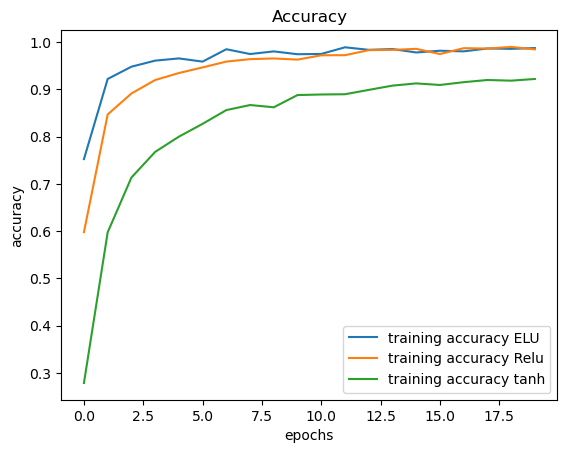

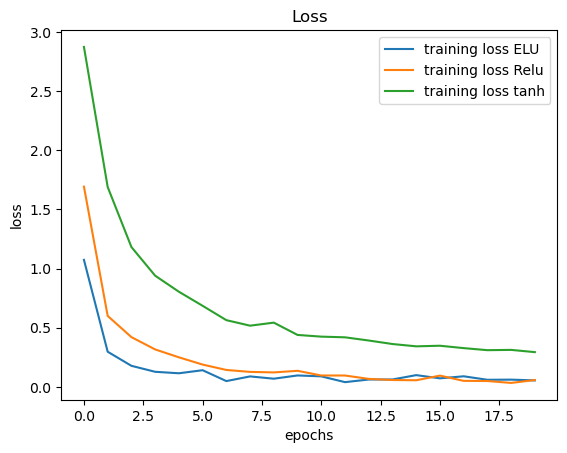

In [49]:
plt.figure(0)
plt.plot(per_history_elu.history['accuracy'], label='training accuracy ELU')
plt.plot(per_history_relu.history['accuracy'], label='training accuracy Relu')
plt.plot(per_history_tanh.history['accuracy'], label='training accuracy tanh')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(per_history_elu.history['loss'], label='training loss ELU')
plt.plot(per_history_relu.history['loss'], label='training loss Relu')
plt.plot(per_history_tanh.history['loss'], label='training loss tanh')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [15]:
model_r.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 14, 14, 16)        448       
                                                                 
 conv2d_4 (Conv2D)           (None, 6, 6, 32)          4640      
                                                                 
 conv2d_5 (Conv2D)           (None, 2, 2, 64)          18496     
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               131584    
                                                                 
 dense_3 (Dense)             (None, 43)                22059     
                                                                 
Total params: 177,227
Trainable params: 177,227
Non-tr

In [16]:
predict_x=model_r.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

91/91 [==============================] - 0s 2ms/step


In [17]:
y_labels=[]
for value in y_test_labels:
    y_labels.append(int(value))

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_labels, classes_x))

0.9187782020131898


# Belgian Dataset

In [55]:
data = []
labels = []
classes = 62
cur_path = os.getcwd()
j=0
#Retrieving the images and their labels 
k=0
for i in range(classes):
    path = os.path.join(cur_path,'./BelgianDataset/Training',str(i))
    images = os.listdir(path)
    
    for a in images:
        try:
            image = Image.open('./BelgianDataset/Training/'+str(i)+'/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
            k = k + 1
        except:
            # print("Error loading image")
            j=j+1

#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape, k)
# Number of Error image
print(j)

(4575, 30, 30, 3) (4575,) 4575
62


In [56]:
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
y_test_labels = y_test
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 62)
y_test = to_categorical(y_test, 62)

(3660, 30, 30, 3) (915, 30, 30, 3) (3660,) (915,)


In [57]:
print(X_test[0].shape)
print(y_test.shape)

(30, 30, 3)
(915, 62)


## ELU on  Belgian Dataset

In [60]:
bel_model_elu = Sequential()
bel_model_elu.add(Conv2D(filters=16, kernel_size=(3,3),strides=(2,2), activation='elu', input_shape=X_train.shape[1:]))
bel_model_elu.add(Conv2D(filters=32, kernel_size=(3, 3),strides=(2,2), activation='elu'))
bel_model_elu.add(Conv2D(filters=64, kernel_size=(3, 3),strides=(2,2), activation='elu'))
bel_model_elu.add(Flatten())
bel_model_elu.add(Dense(512, activation='elu'))
bel_model_elu.add(Dense(62, activation='softmax'))

#Compilation of the model
bel_model_elu.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 20
bel_history_elu = bel_model_elu.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
115/115 [==============================] - 3s 12ms/step - loss: 2.2979 - accuracy: 0.6536 - val_loss: 0.6864 - val_accuracy: 0.8240
Epoch 2/20
115/115 [==============================] - 1s 10ms/step - loss: 0.2819 - accuracy: 0.9279 - val_loss: 0.3788 - val_accuracy: 0.9093
Epoch 3/20
115/115 [==============================] - 1s 10ms/step - loss: 0.1117 - accuracy: 0.9678 - val_loss: 0.2943 - val_accuracy: 0.9191
Epoch 4/20
115/115 [==============================] - 1s 10ms/step - loss: 0.0559 - accuracy: 0.9869 - val_loss: 0.3193 - val_accuracy: 0.9355
Epoch 5/20
115/115 [==============================] - 1s 10ms/step - loss: 0.0557 - accuracy: 0.9866 - val_loss: 0.2794 - val_accuracy: 0.9410
Epoch 6/20
115/115 [==============================] - 1s 10ms/step - loss: 0.0559 - accuracy: 0.9883 - val_loss: 0.2752 - val_accuracy: 0.9333
Epoch 7/20
115/115 [==============================] - 1s 10ms/step - loss: 0.0490 - accuracy: 0.9863 - val_loss: 0.3103 - val_accuracy: 0.9399

# Relu on Belgian Dataset

In [69]:
bel_model_relu = Sequential()
bel_model_relu.add(Conv2D(filters=16, kernel_size=(3,3),strides=(2,2), activation='relu', input_shape=X_train.shape[1:]))
bel_model_relu.add(Conv2D(filters=32, kernel_size=(3, 3),strides=(2,2), activation='relu'))
bel_model_relu.add(Conv2D(filters=64, kernel_size=(3, 3),strides=(2,2), activation='relu'))
bel_model_relu.add(Flatten())
bel_model_relu.add(Dense(512, activation='relu'))
bel_model_relu.add(Dense(62))

#Compilation of the model
sgd = SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
bel_model_relu.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

epochs = 20
bel_history_relu = bel_model_relu.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
115/115 [==============================] - 2s 11ms/step - loss: 9.1331 - accuracy: 0.0536 - val_loss: 8.7713 - val_accuracy: 0.0481
Epoch 2/20
115/115 [==============================] - 1s 9ms/step - loss: 8.3731 - accuracy: 0.0541 - val_loss: 7.6979 - val_accuracy: 0.0481
Epoch 3/20
115/115 [==============================] - 1s 9ms/step - loss: 7.8657 - accuracy: 0.0541 - val_loss: 9.2305 - val_accuracy: 0.0481
Epoch 4/20
115/115 [==============================] - 1s 9ms/step - loss: 8.4042 - accuracy: 0.0541 - val_loss: 9.0719 - val_accuracy: 0.0481
Epoch 5/20
115/115 [==============================] - 1s 9ms/step - loss: 9.0411 - accuracy: 0.0541 - val_loss: 9.5123 - val_accuracy: 0.0481
Epoch 6/20
115/115 [==============================] - 1s 9ms/step - loss: 9.0940 - accuracy: 0.0541 - val_loss: 9.5123 - val_accuracy: 0.0481
Epoch 7/20
115/115 [==============================] - 1s 9ms/step - loss: 9.0940 - accuracy: 0.0541 - val_loss: 9.5123 - val_accuracy: 0.0481
Epoch

## Tanh on Belgian dataset

In [62]:
bel_model_tanh = Sequential()
bel_model_tanh.add(Conv2D(filters=16, kernel_size=(3,3),strides=(2,2), activation='tanh', input_shape=X_train.shape[1:]))
bel_model_tanh.add(Conv2D(filters=32, kernel_size=(3, 3),strides=(2,2), activation='tanh'))
bel_model_tanh.add(Conv2D(filters=64, kernel_size=(3, 3),strides=(2,2), activation='tanh'))
bel_model_tanh.add(Flatten())
bel_model_tanh.add(Dense(512, activation='relu'))
bel_model_tanh.add(Dense(62, activation='softmax'))

#Compilation of the model
sgd = SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
bel_model_tanh.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

epochs = 20
bel_history_tanh = bel_model_tanh.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
115/115 [==============================] - 2s 12ms/step - loss: 3.4729 - accuracy: 0.2063 - val_loss: 2.9557 - val_accuracy: 0.3858
Epoch 2/20
115/115 [==============================] - 1s 10ms/step - loss: 2.5493 - accuracy: 0.4358 - val_loss: 2.3222 - val_accuracy: 0.4503
Epoch 3/20
115/115 [==============================] - 1s 9ms/step - loss: 1.9781 - accuracy: 0.5593 - val_loss: 1.8839 - val_accuracy: 0.6066
Epoch 4/20
115/115 [==============================] - 1s 9ms/step - loss: 1.5876 - accuracy: 0.6617 - val_loss: 1.5753 - val_accuracy: 0.6699
Epoch 5/20
115/115 [==============================] - 1s 9ms/step - loss: 1.3185 - accuracy: 0.7194 - val_loss: 1.3642 - val_accuracy: 0.7158
Epoch 6/20
115/115 [==============================] - 1s 10ms/step - loss: 1.1391 - accuracy: 0.7639 - val_loss: 1.1804 - val_accuracy: 0.7541
Epoch 7/20
115/115 [==============================] - 1s 10ms/step - loss: 1.0126 - accuracy: 0.7967 - val_loss: 1.1318 - val_accuracy: 0.7475
Ep

# Accuracy- Loss graphs for Belgian dataset

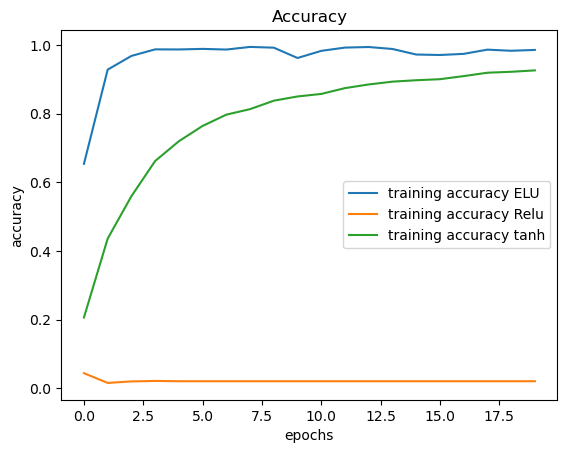

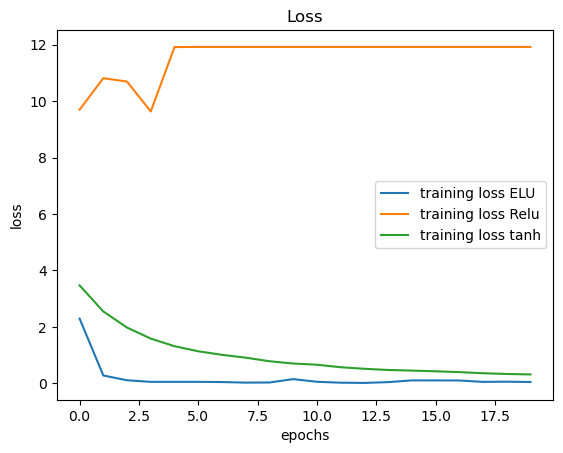

In [63]:
plt.figure(0)
plt.plot(bel_history_elu.history['accuracy'], label='training accuracy ELU')
plt.plot(bel_history_relu.history['accuracy'], label='training accuracy Relu')
plt.plot(bel_history_tanh.history['accuracy'], label='training accuracy tanh')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(bel_history_elu.history['loss'], label='training loss ELU')
plt.plot(bel_history_relu.history['loss'], label='training loss Relu')
plt.plot(bel_history_tanh.history['loss'], label='training loss tanh')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [64]:
bel_model_relu.summary()


Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 14, 14, 16)        448       
                                                                 
 conv2d_61 (Conv2D)          (None, 6, 6, 32)          4640      
                                                                 
 conv2d_62 (Conv2D)          (None, 2, 2, 64)          18496     
                                                                 
 flatten_20 (Flatten)        (None, 256)               0         
                                                                 
 dense_40 (Dense)            (None, 512)               131584    
                                                                 
 dense_41 (Dense)            (None, 62)                31806     
                                                                 
Total params: 186,974
Trainable params: 186,974
Non-t

In [66]:
predict_x=bel_model_relu.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

29/29 [==============================] - 0s 4ms/step


In [67]:
y_labels=[]
for value in y_test_labels:
    y_labels.append(int(value))

In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_labels, classes_x))

0.020765027322404372


# Accuracy and Loss of different Dataset on Relu

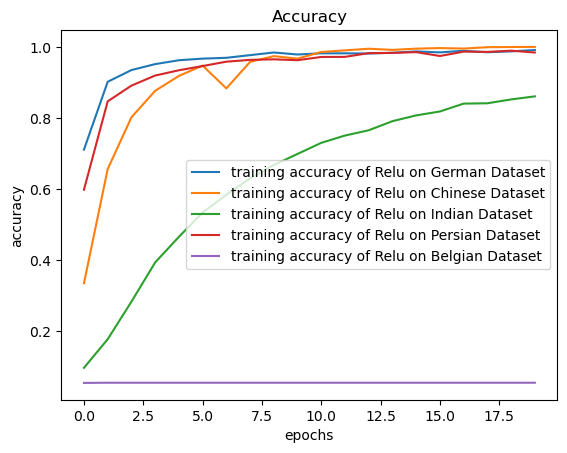

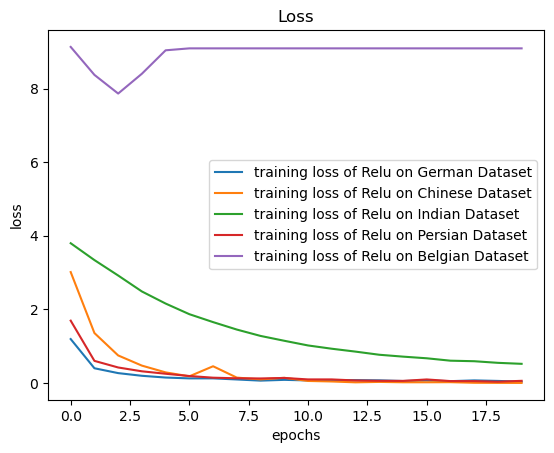

In [70]:
plt.figure(0)
plt.plot(history_relu.history['accuracy'], label='training accuracy of Relu on German Dataset')
plt.plot(ch_history_relu.history['accuracy'], label='training accuracy of Relu on Chinese Dataset')
plt.plot(ind_history_relu.history['accuracy'], label='training accuracy of Relu on Indian Dataset')
plt.plot(per_history_relu.history['accuracy'], label='training accuracy of Relu on Persian Dataset')
plt.plot(bel_history_relu.history['accuracy'], label='training accuracy of Relu on Belgian Dataset')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history_relu.history['loss'], label='training loss of Relu on German Dataset')
plt.plot(ch_history_relu.history['loss'], label='training loss of Relu on Chinese Dataset')
plt.plot(ind_history_relu.history['loss'], label='training loss of Relu on Indian Dataset')
plt.plot(per_history_relu.history['loss'], label='training loss of Relu on Persian Dataset')
plt.plot(bel_history_relu.history['loss'], label='training loss of Relu on Belgian Dataset')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Accuracy and Loss of different Dataset on Elu

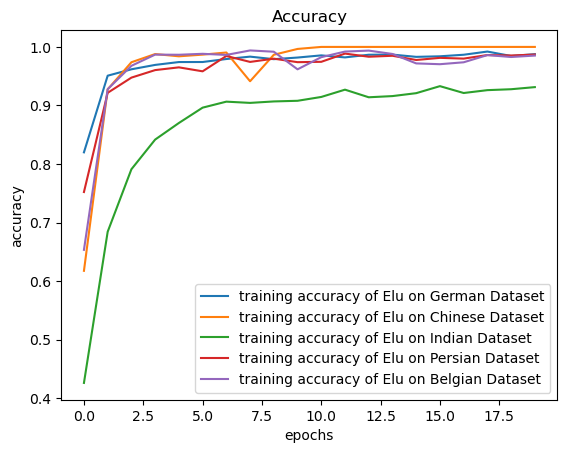

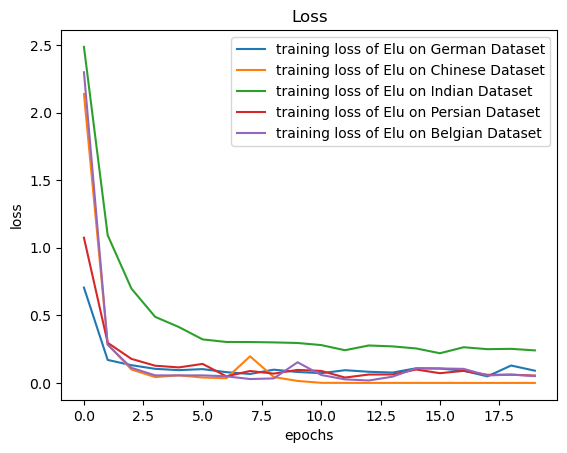

In [71]:
plt.figure(0)
plt.plot(history_elu.history['accuracy'], label='training accuracy of Elu on German Dataset')
plt.plot(ch_history_elu.history['accuracy'], label='training accuracy of Elu on Chinese Dataset')
plt.plot(ind_history_elu.history['accuracy'], label='training accuracy of Elu on Indian Dataset')
plt.plot(per_history_elu.history['accuracy'], label='training accuracy of Elu on Persian Dataset')
plt.plot(bel_history_elu.history['accuracy'], label='training accuracy of Elu on Belgian Dataset')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history_elu.history['loss'], label='training loss of Elu on German Dataset')
plt.plot(ch_history_elu.history['loss'], label='training loss of Elu on Chinese Dataset')
plt.plot(ind_history_elu.history['loss'], label='training loss of Elu on Indian Dataset')
plt.plot(per_history_elu.history['loss'], label='training loss of Elu on Persian Dataset')
plt.plot(bel_history_elu.history['loss'], label='training loss of Elu on Belgian Dataset')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Accuracy and Loss of different Dataset on tanh

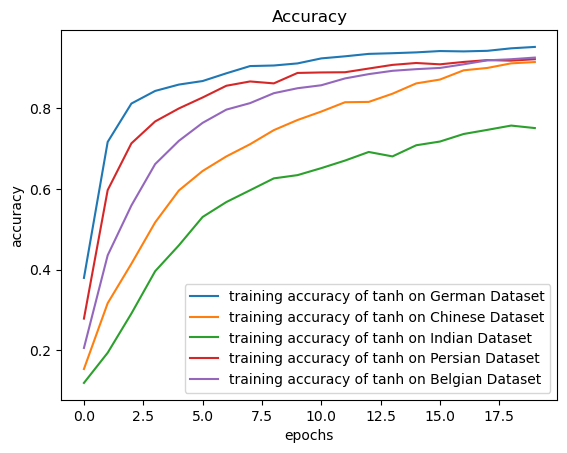

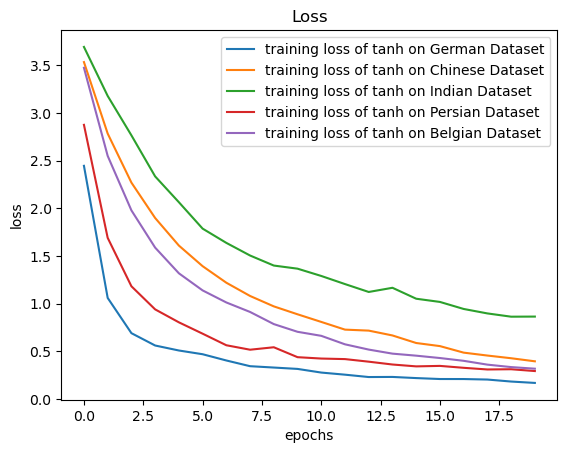

In [72]:
plt.figure(0)
plt.plot(history_tanh.history['accuracy'], label='training accuracy of tanh on German Dataset')
plt.plot(ch_history_tanh.history['accuracy'], label='training accuracy of tanh on Chinese Dataset')
plt.plot(ind_history_tanh.history['accuracy'], label='training accuracy of tanh on Indian Dataset')
plt.plot(per_history_tanh.history['accuracy'], label='training accuracy of tanh on Persian Dataset')
plt.plot(bel_history_tanh.history['accuracy'], label='training accuracy of tanh on Belgian Dataset')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history_tanh.history['loss'], label='training loss of tanh on German Dataset')
plt.plot(ch_history_tanh.history['loss'], label='training loss of tanh on Chinese Dataset')
plt.plot(ind_history_tanh.history['loss'], label='training loss of tanh on Indian Dataset')
plt.plot(per_history_tanh.history['loss'], label='training loss of tanh on Persian Dataset')
plt.plot(bel_history_tanh.history['loss'], label='training loss of tanh on Belgian Dataset')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()